In [2]:
import parse_data.prepare_data as prepare_data
import globals
from plotting import plot_octagon, plot_trajectory
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices

In [3]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # laptop octagon

# json_filename = r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json'
json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json']


In [4]:
# prepare the session dataframe and dataframes of each individual trial
df, trial_list = prepare_data.prepare_data(data_folder, json_filenames)

Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.


In [5]:
## Process data prepare trajectories for plotting

In [6]:
## START SECTION

In [7]:
# flip and rotate the location data for each trial so that the High wall
# is at 0 degrees and the Low wall is at 45 degrees (from top)
flip_rotated_trials = []
for i in range(len(trial_list)):
    flip_rotated_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list=trial_list, trial_index=i))

In [8]:
# find trials with a wall separation of 1
single_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=1)
single_wall_sep_trials = [trial_list[i] for i in single_wall_sep_trial_indices]

In [9]:
# find flipped and rotated versions of all trials with a specific wall seperation between High and Low (note this includes forced trials)
def get_flip_rotated_wall_sep_trials(trial_list, wall_sep=1):
    wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
    wall_sep_trials = [trial_list[i] for i in wall_sep_trial_indices]
    flip_rotated_wall_sep_trials = []
    for i in range(len(wall_sep_trials)):
        flip_rotated_wall_sep_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(wall_sep_trials, trial_index=i))

    return flip_rotated_wall_sep_trials

In [10]:
# run the function above to find trials for 45, 90, and 180 degree wall separations between High and Low
flip_rotated_45_wall_sep_trials = get_flip_rotated_wall_sep_trials(trial_list, wall_sep=1) 
flip_rotated_90_wall_sep_trials = get_flip_rotated_wall_sep_trials(trial_list, wall_sep=2)
flip_rotated_180_wall_sep_trials = get_flip_rotated_wall_sep_trials(trial_list, wall_sep=4)

In [11]:
## END SECTION

In [12]:
## Plotting

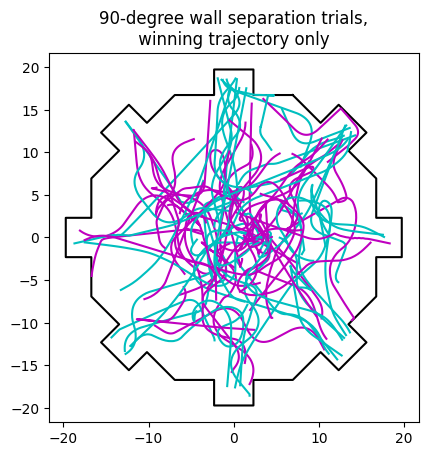

In [13]:
# plot all 45-degree wall separation trials, winning trajectory only
ax = plot_octagon.plot_octagon()
for i in range(len(single_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_trajectory(ax, trial_list=single_wall_sep_trials, trial_index=i)
ax.set_title("90-degree wall separation trials,\n winning trajectory only ")

plt.show()

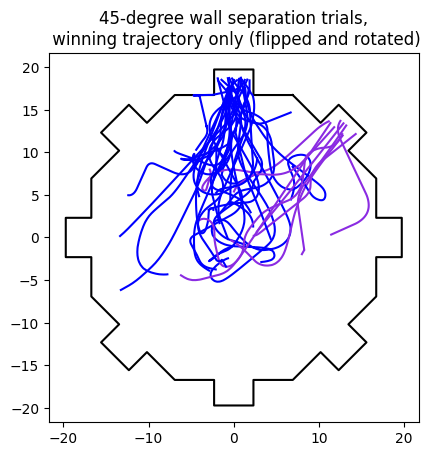

In [14]:
# plot all 45-degree wall separation trials, winning trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_45_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_45_wall_sep_trials, trial_index=i)
ax.set_title("45-degree wall separation trials,\n winning trajectory only (flipped and rotated)")

plt.show()

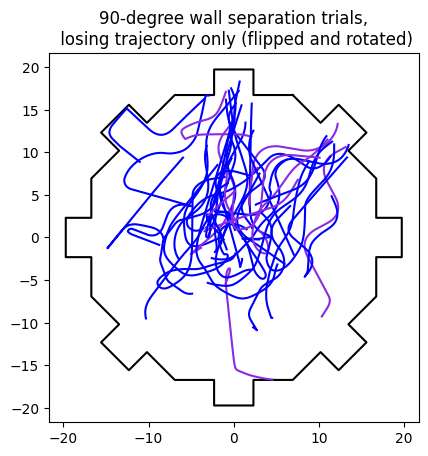

In [15]:
# plot all 45-degree wall separation trials, losing trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_45_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_45_wall_sep_trials, trial_index=i, loser=True)
ax.set_title("90-degree wall separation trials,\n losing trajectory only (flipped and rotated)")

plt.show()

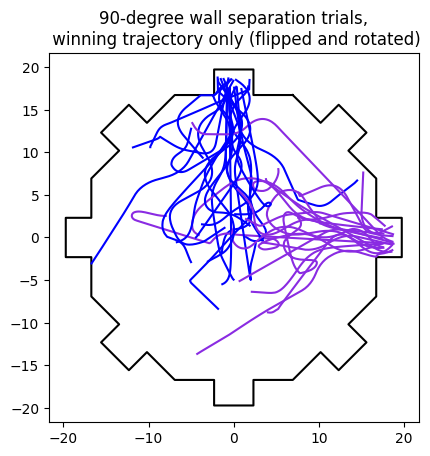

In [16]:
# plot all 90-degree wall separation trials, winning trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_90_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_90_wall_sep_trials, trial_index=i)
ax.set_title("90-degree wall separation trials,\n winning trajectory only (flipped and rotated)")

plt.show()

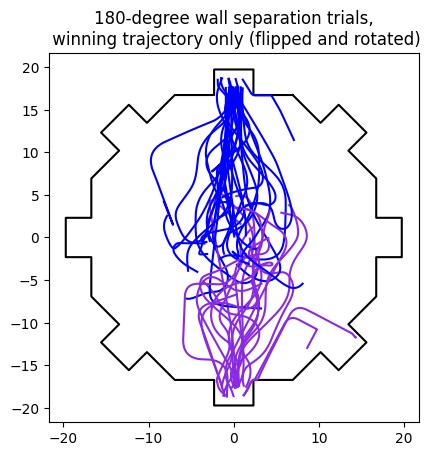

In [17]:
# plot all 180-degree wall separation trials, winning trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_180_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_180_wall_sep_trials, trial_index=i)
ax.set_title("180-degree wall separation trials,\n winning trajectory only (flipped and rotated)")
plt.show()


In [18]:
flip_rotated_trial1 = flip_rotate_trajectories.flip_rotate_trajectories(trial_list, trial_index=1)

Text(0.5, 1.0, 'single trial trajectory, both winner and loser')

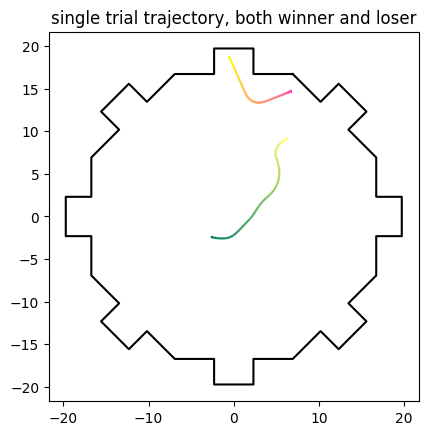

In [19]:
# plot a single trial trajectory, both winner and loser
ax = plot_octagon.plot_octagon()
ax = plot_trajectory.plot_trial_trajectory_colour_map(ax, trial=flip_rotated_trial1)
ax.set_title("single trial trajectory, both winner and loser")

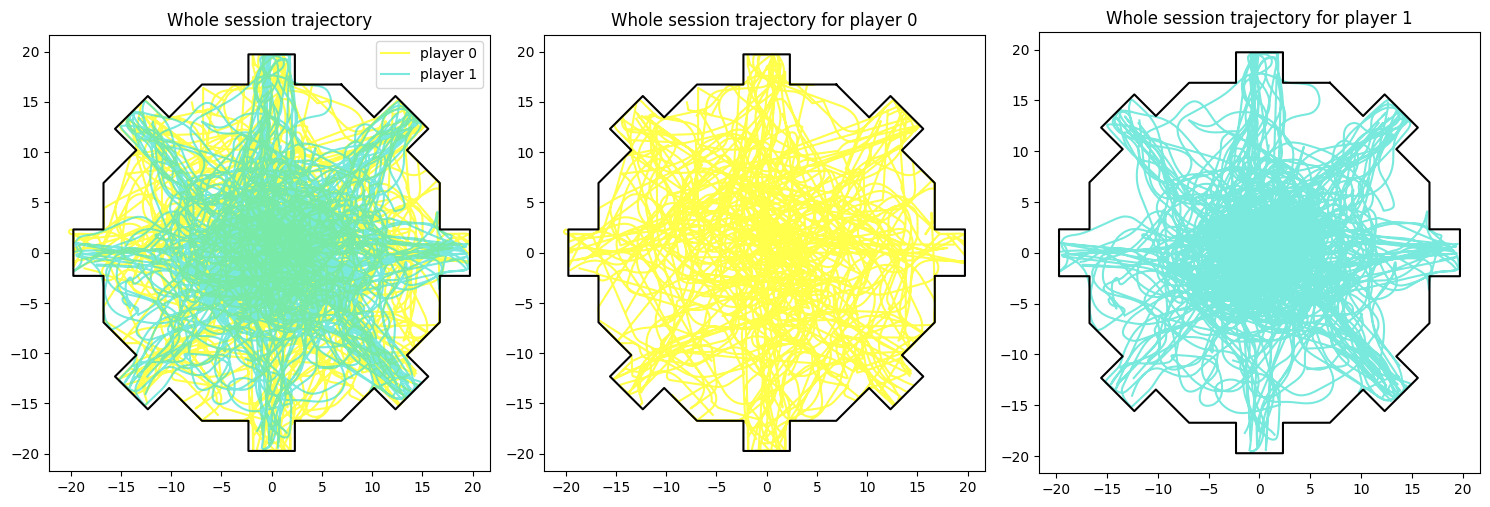

In [20]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], df)
axs[0] = plot_octagon.plot_octagon(axs[0])
axs[1] = plot_trajectory.plot_session_trajectory(axs[1], df, chosen_player=0)
axs[1] = plot_octagon.plot_octagon(axs[1])
axs[2] = plot_trajectory.plot_session_trajectory(axs[2], df, chosen_player=1)
axs[2] = plot_octagon.plot_octagon(axs[2])

axs[0].legend()

plt.tight_layout()
